# Time Series Analysis
시간 순서대로 수집하거나 정렬한 순차적인(Sequential) 데이터를 기반으로 미래 시점의 데이터를 추정 하는
것

*   상품의 수요 예측이나 경제 지표를 바탕으로 주가 예측을 하는 데 사용
*   시계열 분석의 특징
  - 시계열 분석은 예측하는 것으로 변동 가능성을 전제로 한다
  - 시계열은 다변량 분석이 요구된다
  - 시계열 데이터는 분석을 위한 데이터셋 변형이 어렵다

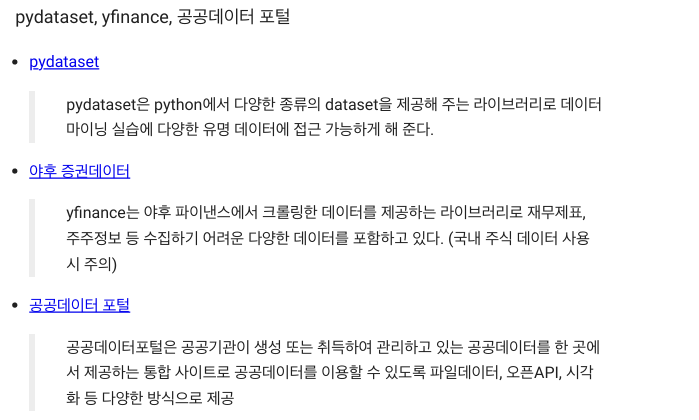

In [1]:
!pip install pydataset
!pip install numpy==1.26

In [2]:
# python에서 제공하는 pydataset에서 가져오기
from pydataset import data
dataList = data()
print(type(dataList))
#1 print(dataList.columns)
#2 print(dataList.values)
#3 print(any('Airline' in word for word in dataList['title']))

# 가져온 data 중 'Air'가 들어가는 데이터셋 출력
for x in dataList.values:
 if('Air' in x[1]):
    print(x[0], ': ', x[1])

<class 'pandas.core.frame.DataFrame'>
AirPassengers :  Monthly Airline Passenger Numbers 1949-1960
airmiles :  Passenger Miles on Commercial US Airlines, 1937-1960
airquality :  New York Air Quality Measurements
aircondit :  Failures of Air-conditioning Equipment
aircondit7 :  Failures of Air-conditioning Equipment
NOxEmissions :  NOx Air Pollution Data
aircraft :  Aircraft Data
airmay :  Air Quality Data
Airline :  Cost for U.S. Airlines
Airq :  Air Quality for Californian Metropolitan Areas
summer :  Air pollution data, separately for summer and winter months
winter :  Air pollution data, separately for summer and winter months


In [3]:
data('AirPassengers', show_doc=True)
# 'AirPassengers' 데이터셋 저장
air = data('AirPassengers')

AirPassengers

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Monthly Airline Passenger Numbers 1949-1960

### Description

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

### Usage

    AirPassengers

### Format

A monthly time series, in thousands.

### Source

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) _Time Series Analysis,
Forecasting and Control._ Third Edition. Holden-Day. Series G.

### Examples

    ## Not run: 
    ## These are quite slow and so not run by example(AirPassengers)
    ## The classic 'airline model', by full ML
    (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                  seasonal = list(order = c(0, 1, 1), period = 12)))
    update(fit, method = "CSS")
    update(fit, x = window(log10(AirPassengers), start = 1954))
    pred <- predict(fit, n.ahead = 24)
    tl <- pred$pred - 1.96 * pred$se
    tu <- pred$pred + 1.96 * pred$se
    ts.plot(

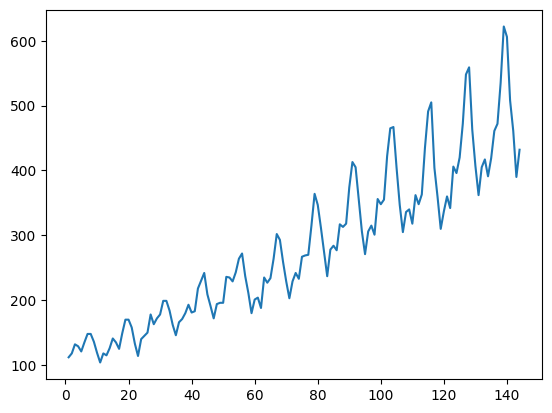

In [4]:
import matplotlib.pyplot as plt
# airData에는 데이터셋 중에서 AirPassengers만 가져오기
airData = air['AirPassengers']
plt.plot(airData)
plt.show()

In [5]:
!pip install yfinance --upgrade --no-cache-dir

In [6]:
 import yfinance as yf # yfinance를 통해 주식 데잍어 가져오기
 tsla = yf.download('TSLA', start='2019-01-01', end='2023-12-31') # 시작과 끝 일자 정하기
 #x = yf.Ticker('TSLA')
 #hist = x.history(period='1y')
 tsla

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2019-01-02,20.674667,21.008667,19.920000,20.406668,174879000
2019-01-03,20.024000,20.626667,19.825333,20.466667,104478000
2019-01-04,21.179333,21.200001,20.181999,20.400000,110911500
2019-01-07,22.330667,22.449333,21.183332,21.448000,113268000
2019-01-08,22.356667,22.934000,21.801332,22.797333,105127500
...,...,...,...,...,...
2023-12-22,252.539993,258.220001,251.369995,256.760010,93249800
2023-12-26,256.609985,257.970001,252.910004,254.490005,86892400


<Axes: xlabel='Date'>

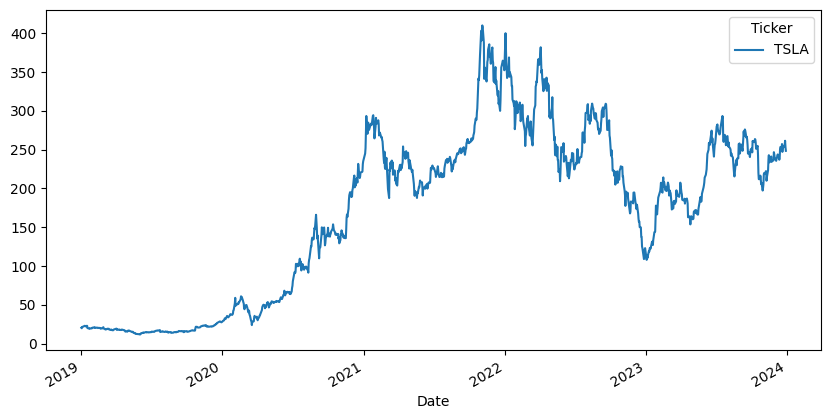

In [7]:
import pandas as pd
df_tsla = pd.DataFrame(tsla['Close']) # 테슬라 주식의 '종가'만 가져오기
import matplotlib.pyplot as plt
df_tsla.plot(figsize=(10, 5)) # '종가' 데이터 그리기

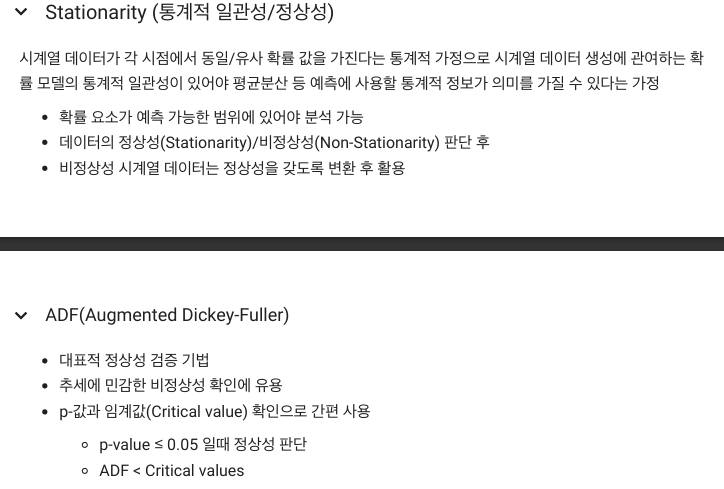

In [8]:
from statsmodels.tsa.stattools import adfuller # 추세에 민감한 비정상성 확인 ADF

print('ADF test with TSLA time-series')

ADF_result = adfuller(df_tsla.values) # ADF 모델에 테슬라 데이터 사용
print('ADF Stats: %f' % ADF_result[0]) # ADF 값
print('p-value: %f' % ADF_result[1]) # p-값 및
print('Critical values:' ) # 임계값 확인
for key, value in ADF_result[4].items(): # ADF는 result[4]가 key, value 딕셔너리 형태, p값 < 0.05 일 때 정상
  print('\t%3s: %.4f' % (key, value)) # 결과는 p값 0.4357.. 이므로 > 0.05 ==> 비정상

#ADF < Critical Values(임계값)  결과는? ADF : -1.69 , 임계값 : -3.4, -2.8, -2.5 즉 -> ADF > 임계값 = 비정상

ADF test with TSLA time-series
ADF Stats: -1.691042
p-value: 0.435734
Critical values:
	 1%: -3.4356
	 5%: -2.8639
	10%: -2.5680


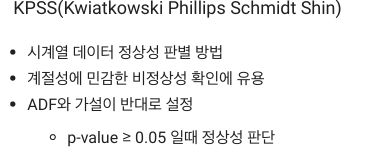

In [9]:
from statsmodels.tsa.stattools import kpss # 계절성 민감한 비정상성 판단

print('KPSS test with TSLA time-series')
KPSS_result = kpss(df_tsla.values)
print('KPSS Stats: %f' % KPSS_result[0]) # KPSS 결과값
print('p-value: %f' % KPSS_result[1]) # p 값
print('Critical values:')
for key, value in KPSS_result[3].items(): #KPSS는 result[3]이 key, value 딕셔너리 형태
  print('\t%5s: %.4f' % (key, value)) # ADF는 result[4]였다

#ADF와 반대로 p값 >= 0.05 일 때 정상, ADF와 반대
#결과는? p값 0.01 < 0.05 이므로 비정상

KPSS test with TSLA time-series
KPSS Stats: 3.871208
p-value: 0.010000
Critical values:
	  10%: 0.3470
	   5%: 0.4630
	 2.5%: 0.5740
	   1%: 0.7390


<ipython-input-9-e24876e50e0a>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPSS_result = kpss(df_tsla.values)


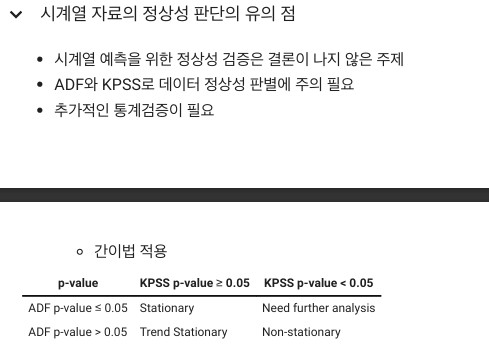

In [10]:
# ADF, KPSS 사용
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# 시계열 데이터 간이법
decision = [['Stationary', 'Need further analysis'],
           ['Trend Stationary', 'No-stationary']]

print(decision[0][0], decision[0][1])
print(decision[1][0], decision[1][1])

def checkStationarity(values): # ADF 및 KPSS를 모두 사용하여 정상성 판단
  print('         ADF          KPSS')
  ADF_result = adfuller(values) # ADF 결과
  KPSS_result = kpss(values) # KPSS 결과
  print('  Stats: %f     %f' % (ADF_result[0], KPSS_result[0])) # ADF 스탯, KPSS 스탯
  print('p-value: %f     %f' % (ADF_result[1], KPSS_result[1])) # ADF는 p값 < 0.05, KPSS p값 >= 0.05 일 때 정상
  d = decision[1 if ADF_result[1]>0.05 else 0][1 if KPSS_result[1]<0.05 else 0] # p값 크기를 통해 결정
  print('Decision: ', d)
  return

checkStationarity(df_tsla.values)

Stationary Need further analysis
Trend Stationary No-stationary
         ADF          KPSS
  Stats: -1.691042     3.871208
p-value: 0.435734     0.010000
Decision:  No-stationary


<ipython-input-10-dc058c5e1efa>:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPSS_result = kpss(values) # KPSS 결과


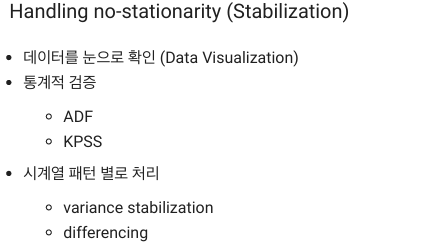

In [11]:
# 평균선은 stabilization
# 분산, Power 등 진폭은 differencing으로 잡는다

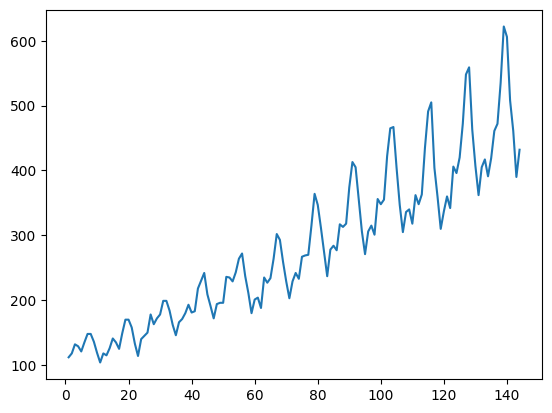

         ADF          KPSS
  Stats: 0.815369     1.651312
p-value: 0.991880     0.010000
Decision:  No-stationary


<ipython-input-10-dc058c5e1efa>:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPSS_result = kpss(values) # KPSS 결과


In [12]:
import matplotlib.pyplot as plt
plt.plot(airData)
plt.show()
checkStationarity(airData)
#결과? ADF p값 : 0.99, KPSS p값 : 0.01

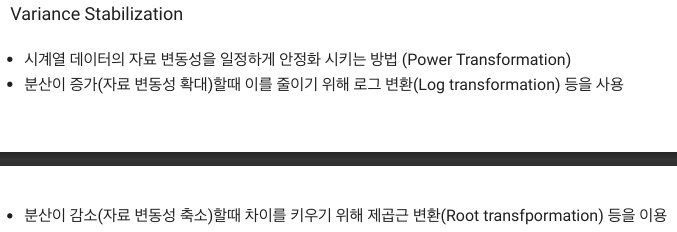

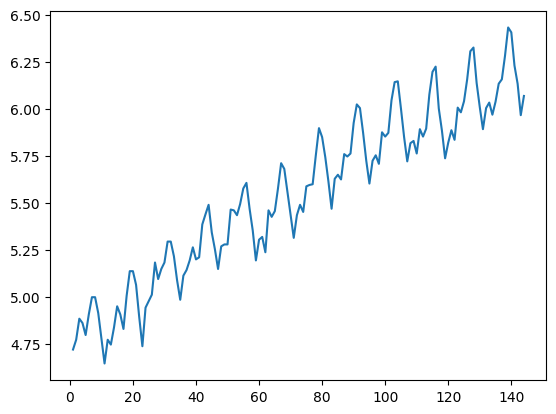

         ADF          KPSS
  Stats: -1.717017     1.668651
p-value: 0.422367     0.010000
Decision:  No-stationary


<ipython-input-10-dc058c5e1efa>:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPSS_result = kpss(values) # KPSS 결과


In [13]:
import numpy as np
logAirData = np.log(airData)
plt.plot(logAirData)
plt.show()
checkStationarity(logAirData)

# log형태로 바꾸니, 진폭의 크기가 일정해짐
# 결과? ADF p값 : 0.42, KPSS p값 : 0.01
# KPSS는 추세는 변화가 거의 없기 때문에 p값이 변화X

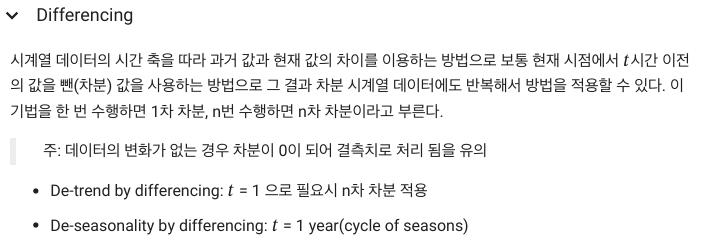

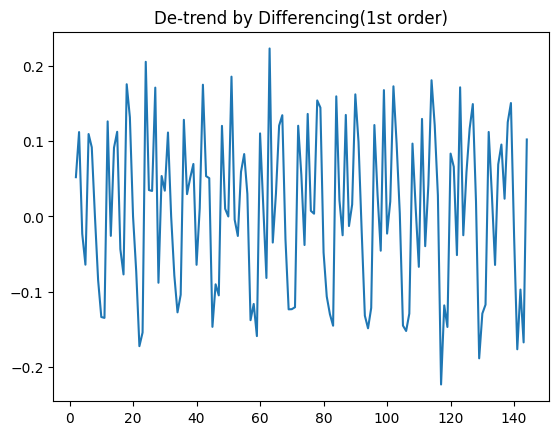

         ADF          KPSS
  Stats: -2.717131     0.038304
p-value: 0.071121     0.100000
Decision:  Trend Stationary


<ipython-input-10-dc058c5e1efa>:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  KPSS_result = kpss(values) # KPSS 결과


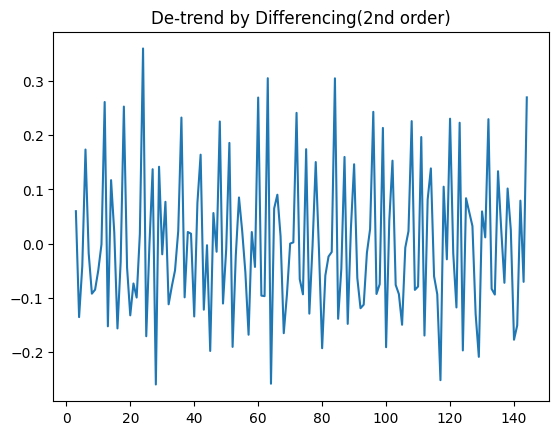

         ADF          KPSS
  Stats: -8.196629     0.059624
p-value: 0.000000     0.100000
Decision:  Stationary


<ipython-input-10-dc058c5e1efa>:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  KPSS_result = kpss(values) # KPSS 결과


In [14]:
# 첫 번째
diffLogAirData = logAirData.diff(1).dropna() #diff 함수 제공해줌, 과거와 현재 비교, diff(1)은 1차 차분
diffLogAirData.plot()

plt.title('De-trend by Differencing(1st order)')
plt.show()
checkStationarity(diffLogAirData) # 1st order 결과 KPSS p값 정상치 -> Trend 정상

# 두 번째
diff2LogAirData = diffLogAirData.diff(1).dropna()
diff2LogAirData.plot()

plt.title('De-trend by Differencing(2nd order)')
plt.show()
checkStationarity(diff2LogAirData) # 2nd order 결과 ADF,KPSS p값 모두 정상치 -> 정상

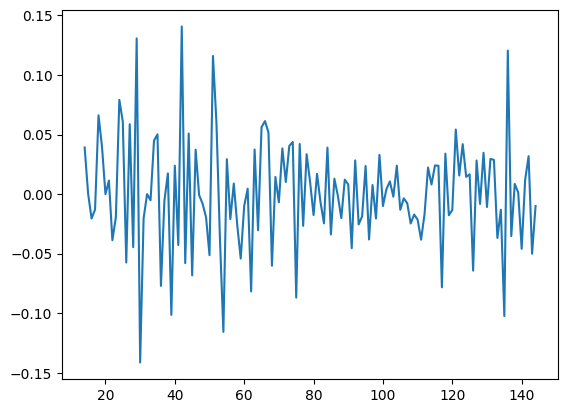

         ADF          KPSS
  Stats: -8.196629     0.059624
p-value: 0.000000     0.100000
Decision:  Stationary


<ipython-input-10-dc058c5e1efa>:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  KPSS_result = kpss(values) # KPSS 결과


In [15]:
stableAirData = diffLogAirData.diff(12).dropna() # 12차분, 원본 데이터가 주기성을 보여서 1년 12개월로 차분해봄
stableAirData.plot()
plt.show()
checkStationarity(diff2LogAirData)

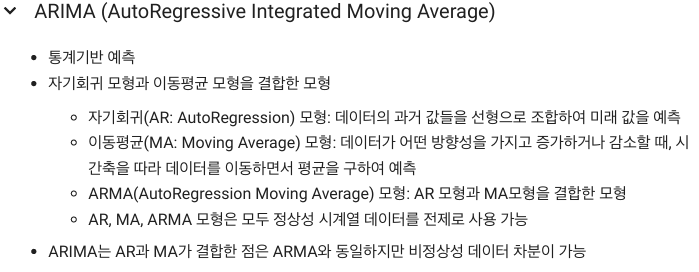

In [16]:
!pip install yfinance --upgrade --no-cache-dir

In [17]:
# 테슬라 데이터로 시계열 분석하기
import pandas as pd
import yfinance as yf
tsla = yf.download('TSLA', start='2021-11-01', end='2023-03-31')
df_tsla = pd.DataFrame(tsla['Close'])
df_tsla.head()

[*********************100%***********************]  1 of 1 completed


Ticker,TSLA
Date,
2021-11-01,402.863342
2021-11-02,390.666656
2021-11-03,404.619995
2021-11-04,409.970001
2021-11-05,407.363342


In [18]:
df_tsla = df_tsla.reset_index() # Date 인덱스 추출
df_tsla.columns = ['date', 'value'] # date와 value값으로 columns 재구성
df_tsla['date'] = pd.to_datetime(df_tsla['date']) # 날짜 형식으로 변경
df_tsla.head()

,date,value
0,2021-11-01,402.863342
1,2021-11-02,390.666656
2,2021-11-03,404.619995
3,2021-11-04,409.970001
4,2021-11-05,407.363342


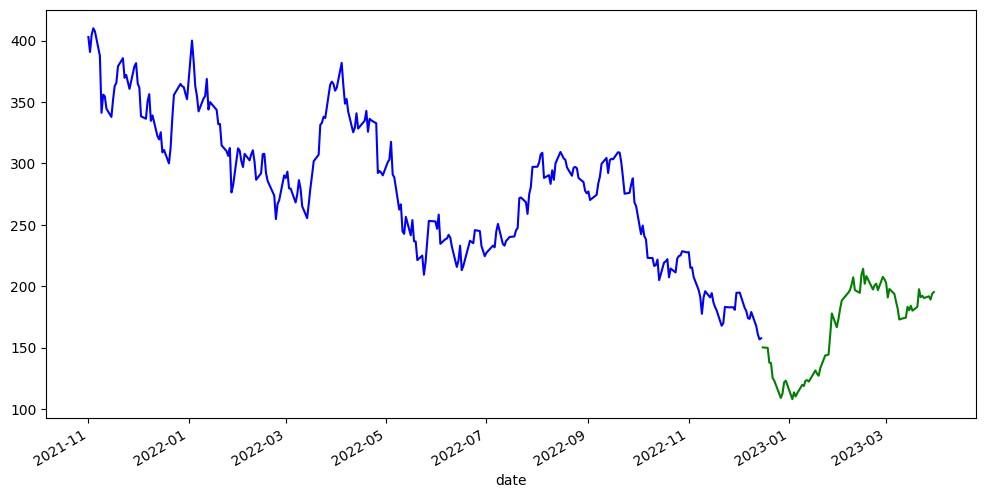

In [19]:
import matplotlib.pyplot as plt
# 전체 80% 까지의 데이터로 train 이후 20%로 test 생성
df_tsla_train = pd.DataFrame(df_tsla['value'][:int(0.8*len(df_tsla))])
df_tsla_test = pd.DataFrame(df_tsla['value'][int(0.8*len(df_tsla)):])
df_tsla_train['date'] = df_tsla['date'][:int(0.8*len(df_tsla))]
df_tsla_test['date'] = df_tsla['date'][int(0.8*len(df_tsla)):]

# 인덱스를 date로 설정
df_tsla_train.set_index('date', inplace=True)
df_tsla_test.set_index('date', inplace=True)

df_tsla_train['value'].plot(figsize=(12, 6), color='blue')
df_tsla_test['value'].plot(color='green')
plt.show()
#df_tsla_test

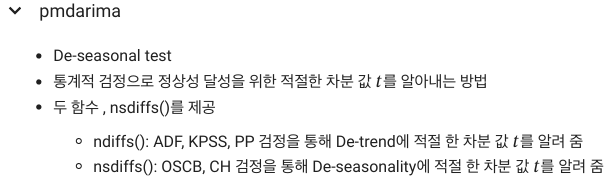

In [20]:
!pip install pmdarima

In [21]:
from pmdarima.arima import ndiffs, nsdiffs

# 각 검정 방식에 따른 최적 차분 구하기 -> ndiffs
print(f"최적의 차분 횟수 (ADF): {ndiffs(df_tsla_train, test='adf')}")
print(f"최적의 차분 횟수 (KPSS): {ndiffs(df_tsla_train, test='kpss')}")
print(f"최적의 차분 횟수 (PP): {ndiffs(df_tsla_train, test='pp')}")

최적의 차분 횟수 (ADF): 1
최적의 차분 횟수 (KPSS): 1
최적의 차분 횟수 (PP): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [22]:
print(f"최적의 차분 계수 (OSCB): {nsdiffs(df_tsla_train, m=12, test='ocsb')}")
print(f"최적의 차분 계수 (CH): {nsdiffs(df_tsla_train, m=12, test='ch')}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


최적의 차분 계수 (OSCB): 0
최적의 차분 계수 (CH): 0


In [23]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [24]:
n_diffs = 1 # 1차분

# 테슬라 train 데이터셋의 값을 토대로 pmdarima 모델 학습 (1차분)
model_fit = pm.auto_arima(y=df_tsla_train['value'], d=n_diffs,
                         start_p=0, max_p=2, start_q=0, max_q=2, m=1,
                         seasonal=False, stepwise=True, trace=True)

# 결과 출력
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2197.802, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2199.194, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2199.177, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2197.357, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2200.676, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.877 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  284
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1097.679
Date:                Tue, 06 May 2025   AIC                           2197.357
Time:                        12:23:45   BIC                           2201.003
Sample:                             0   HQIC                          2198.819
                                - 284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       136.9497      8.602     15.920      0.000     120.089 

In [25]:
tsla_pred= model_fit.predict(n_periods=len(df_tsla_test)) # test 데이터를 통해 예측값 생성

#print(type(tsla_pred), tsla_pred.array)

# 예측값으로 DataFrame 생성
df_tsla_pred = pd.DataFrame(tsla_pred.array, index=df_tsla_test.index, columns=['value'])
df_tsla_pred

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,value
date,
2022-12-16,157.669998
2022-12-19,157.669998
2022-12-20,157.669998
2022-12-21,157.669998
2022-12-22,157.669998
2022-12-23,157.669998
2022-12-27,157.669998
2022-12-28,157.669998
2022-12-29,157.669998


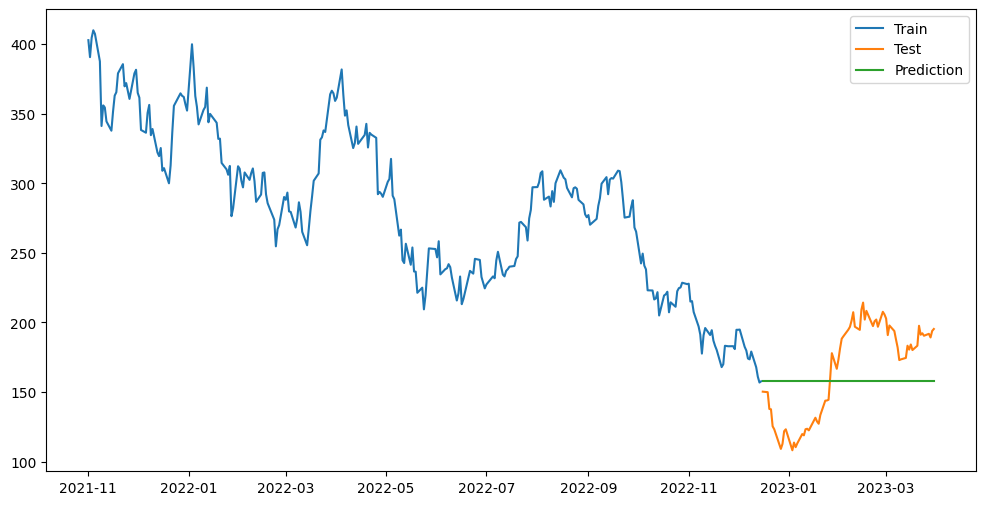

In [26]:
# Train, Test의 실제값과
# 예측값을 그래프로 표시

fig, axes = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(df_tsla_train, label='Train')
plt.plot(df_tsla_test, label='Test')
plt.plot(df_tsla_pred, label='Prediction')
plt.legend()
plt.show()

In [27]:
def each_step_prediction():
  pred_next = model_fit.predict(n_periods=1) # 기간을 하나씩 추가하면서 fitting
  return pred_next.tolist()[0] # 하나씩 예측한 예측값을 붙여서 진행


pred_steps = [] # test 값을 하나씩 확인하며 예측
for new_inst in df_tsla_test['value']:
  pred = each_step_prediction()
  pred_steps.append(pred)
  model_fit.update(new_inst)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was

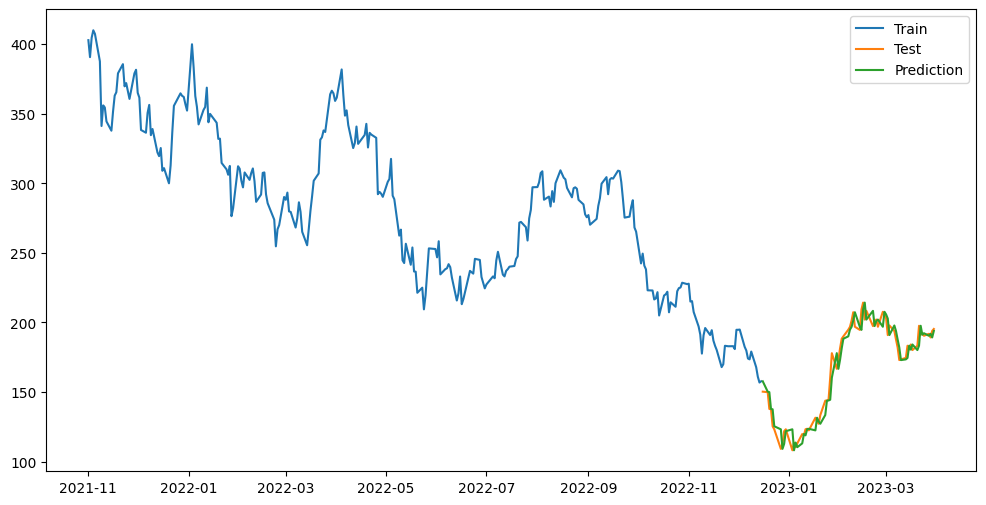

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(df_tsla_train.index, df_tsla_train['value'], label='Train')
plt.plot(df_tsla_test.index, df_tsla_test['value'], label='Test')
plt.plot(df_tsla_test.index, pred_steps, label='Prediction')
plt.legend()
plt.show()